In [1]:
!git clone https://github.com/haladaher2024/ML_project.git


Cloning into 'ML_project'...
remote: Enumerating objects: 2662, done.
remote: Counting objects: 100% (2662/2662), done.
remote: Compressing objects: 100% (1820/1820), done.
remote: Total 2662 (delta 9), reused 2637 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (2662/2662), 8.22 MiB | 20.98 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Handling missing labels

In [4]:
import os
from collections import Counter

# Define paths
image_folder = '/content/ML_project/data/images'
label_folder = '/content/ML_project/data/labels'

# Step 1: List files
image_files = sorted(os.listdir(image_folder))
label_files = sorted(os.listdir(label_folder))

# Step 2: Extract basenames (without extensions)
image_basenames = {os.path.splitext(f)[0] for f in image_files}
label_basenames = {os.path.splitext(f)[0] for f in label_files}

# Step 3: Detect missing labels
missing_labels = image_basenames - label_basenames
missing_count = len(missing_labels)
total_images = len(image_basenames)
missing_percentage = (missing_count / total_images) * 100

print(f" Total images: {total_images}")
print(f" Missing labels: {missing_count}")
print(f" Missing %: {missing_percentage:.2f}%")

# Step 4: Handle missing labels
if missing_count == 0:
    print(" All images have corresponding labels.")

elif missing_percentage < 5:
    print("Removing unmatched images less than 5% of labels is missing")
    deleted = 0
    for name in missing_labels:
        img_path = os.path.join(image_folder, name + ".jpg")
        if os.path.exists(img_path):
            os.remove(img_path)
            deleted += 1
    print(f" Deleted {deleted} unmatched images.")
else:
    print("More than 5% of images are missing labels. Please review your dataset.")

# Step 5: Final check
final_images = len(os.listdir(image_folder))
final_labels = len(os.listdir(label_folder))
print(f"Final image count: {final_images}")
print(f" Final label count: {final_labels}")


 Total images: 872
 Missing labels: 0
 Missing %: 0.00%
 All images have corresponding labels.
Final image count: 872
 Final label count: 878


# Checking if the Data is balanced

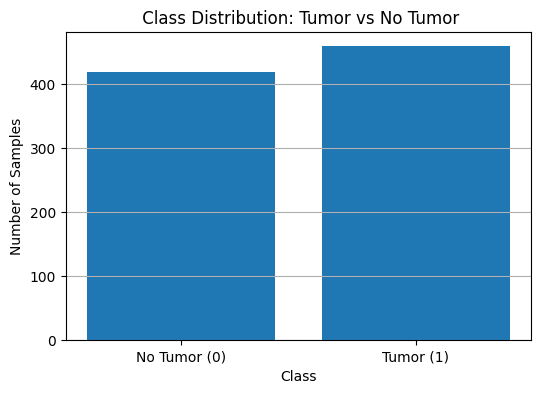


Data is balanced


In [5]:
import matplotlib.pyplot as plt


from collections import Counter
label_folder = '/content/ML_project/data/labels'
label_counts = Counter()

for file in os.listdir(label_folder):
    with open(os.path.join(label_folder, file), 'r') as f:
        line = f.readline().strip()
        if line:
            label = int(line.split()[0])
            label_counts[label] += 1

# Plot
labels = ['No Tumor (0)', 'Tumor (1)']
counts = [label_counts[0], label_counts[1]]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.title(" Class Distribution: Tumor vs No Tumor")
plt.ylabel("Number of Samples")
plt.xlabel("Class")
plt.grid(axis='y')
plt.savefig('/content/ML_project/outputs/class_distribution.png')

plt.show()
if(abs(label_counts[0]-label_counts[1])<100):
 print()
 print('Data is balanced')
else:
  print()
  print("Data is imbalanced")

# Image Preprocessing

## Resize images


In [6]:
def standardize_image(image, target_size=(224, 224)):
    # Resize image
    resized = cv2.resize(image, target_size)

    return resized

## Image enhancement

In [7]:
def enhance_image(image):
    # Convert to grayscale for some operations if needed
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    else:
        gray = image.copy()

    # Histogram equalization to improve contrast
    equalized = cv2.equalizeHist(gray)

    # Optional: Add noise reduction technique
    denoised = cv2.GaussianBlur(equalized, (5, 5), 0)

    return denoised

## Visualization with Bounding Box

In [8]:
def visualize_with_bounding_box(image, label_path):

    # Read label
    with open(label_path, 'r') as f:
        line = f.readline().strip().split()

    has_tumor = int(line[0])

    if has_tumor == 1:
        # Format: class x_center y_center width height
        x_center, y_center = float(line[1]), float(line[2])
        width, height = float(line[3]), float(line[4])

        # Convert normalized coordinates to pixel values
        img_height, img_width = image.shape[:2]
        x_center = int(x_center * img_width)
        y_center = int(y_center * img_height)
        box_width = int(width * img_width)
        box_height = int(height * img_height)

        # Calculate top-left corner
        x1 = int(x_center - box_width/2)
        y1 = int(y_center - box_height/2)

        if len(image.shape) == 2:  # Check if image is grayscale
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x1 + box_width, y1 + box_height), (0, 255, 0), 2)


    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap = 'gray')
    plt.title(f"Class: {'Tumor' if has_tumor == 1 else 'No Tumor'}")
    plt.axis('off')
    #plt.show()

## Apply Image Preprocessing on Dataset

In [9]:
import cv2
from google.colab.patches import cv2_imshow

# Create folder for the enhanced images to compare
directory = '/content/ML_project/data/enhanced_images/'
os.makedirs(directory, exist_ok=True)

# Apply the image preprocessing functions on the data set
for i,img in enumerate(image_files):
  image_path = os.path.join(image_folder,image_files[i])
  image = cv2.imread(image_path)
  label = os.path.join(label_folder, label_files[i])

  image = standardize_image(image)
  image = enhance_image(image)

  # Add them to the new folder
  cv2.imwrite(os.path.join(directory, image_files[i]), image)

# Before and After Image Preprocessing

# 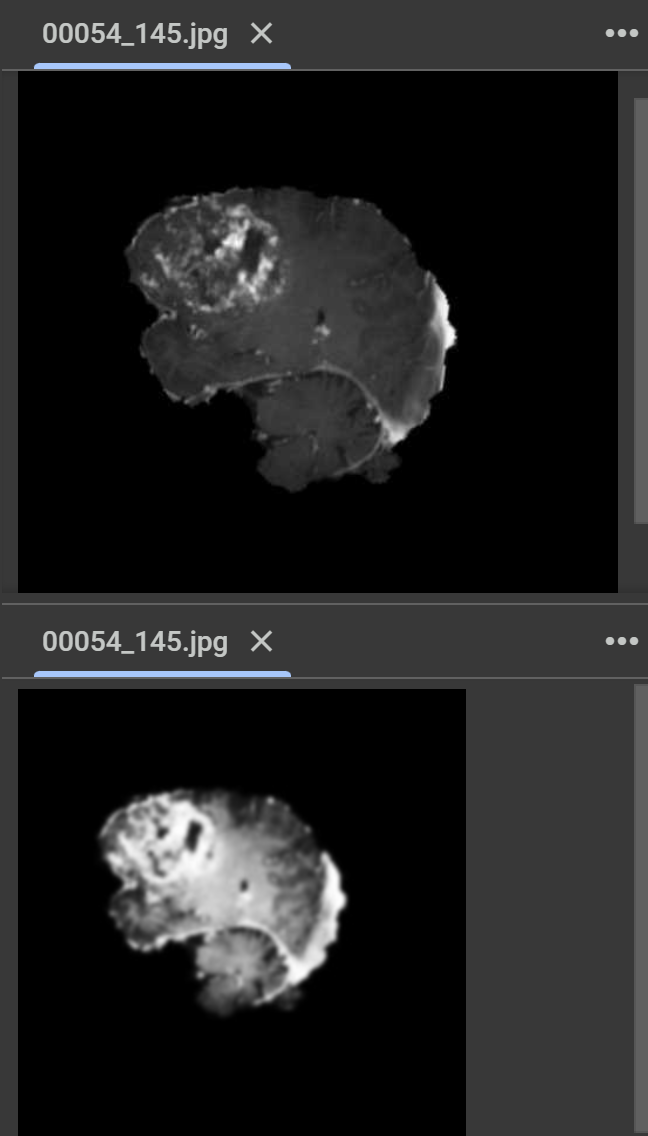

# Visualizing on a Single Sample

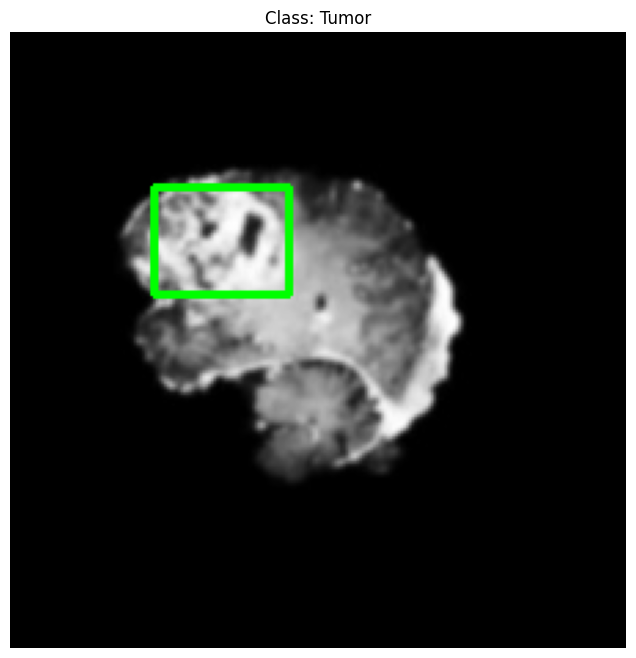

In [14]:
enhanced_image_files = sorted(os.listdir(directory))
enhanced_image_path = os.path.join(directory, enhanced_image_files[0])
enhanced_image = cv2.imread(enhanced_image_path)
label = os.path.join(label_folder, label_files[0])
visualize_with_bounding_box(enhanced_image, label)